In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/statlog_heart/heart_data.csv')
df = df.iloc[:100]


In [10]:
df = df.rename(columns={'heart_disease': 'target'})
X = df.drop('target', axis=1)
y = df['target']
print(X.shape, y.shape)

(100, 13) (100,)


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-np.pi, np.pi))
X = scaler.fit_transform(X)
y = np.array(y).reshape(-1, 1)

Data:  (100, 13) (100, 1)
Train set: (70, 13) (70, 1)
Validation set: (20, 13) (20, 1)
Test set: (10, 13) (10, 1)


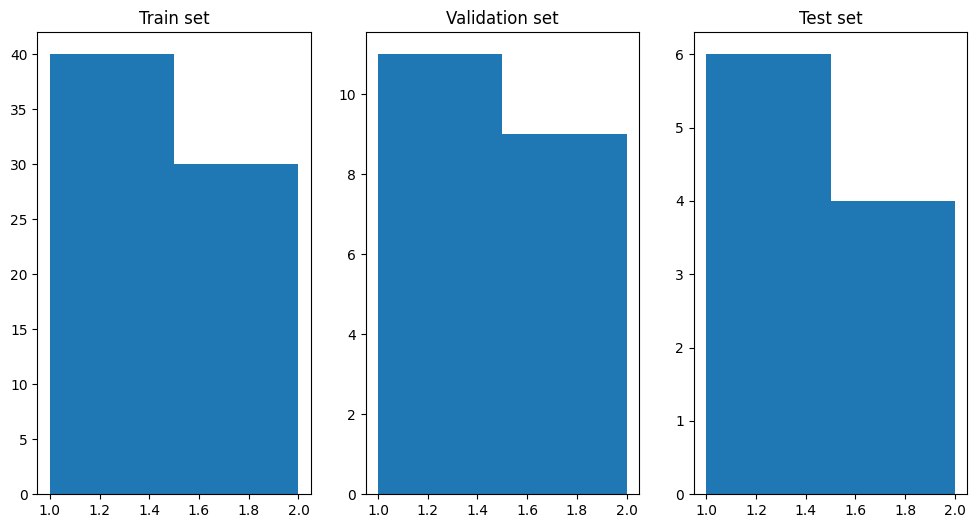

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

sss_train_test = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in sss_train_test.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

sss_valid_test = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)

for valid_index, test_index in sss_valid_test.split(X_test, y_test):
    X_valid, X_test = X_test[valid_index], X_test[test_index]
    y_valid, y_test = y_test[valid_index], y_test[test_index]

print("Data: ", X.shape, y.shape)
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_valid.shape, y_valid.shape)
print("Test set:", X_test.shape, y_test.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(y_train, bins=2)
plt.title('Train set')
plt.subplot(1, 3, 2)
plt.hist(y_valid, bins=2)
plt.title('Validation set')
plt.subplot(1, 3, 3)
plt.hist(y_test, bins=2)
plt.title('Test set')
plt.show()



In [13]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.algorithms import VQC
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap
from qiskit_algorithms.optimizers import COBYLA

In [14]:
zz_feature_map = ZZFeatureMap(
    feature_dimension=X_train.shape[1], 
    reps=2)
pauli_feature_map = PauliFeatureMap(
    feature_dimension=X_train.shape[1], 
    reps=2, paulis=["Z", "YY"], 
    entanglement="full"
)


In [15]:
from src.experiment import Experiment

experiment1 = Experiment(
    X_train, y_train, 
    X_valid, y_valid, 
    X_test, y_test, 
    num_qubits=X_train.shape[1]
)

experiment2 = Experiment(
    X_train, y_train, 
    X_valid, y_valid, 
    X_test, y_test, 
    num_qubits=X_train.shape[1]
)

In [16]:
from src.ansatz import *

In [17]:
# print(zz_feature_map._base_name)
# print(pauli_feature_map._base_name)

In [18]:
print("[+] Running experiment with ZZ Feature Map...")
experiment1.run_experiment(zz_feature_map, [ansatz_1, ansatz_2, ansatz_3, ansatz_4], max_reps=3)
experiment2.plot_results()

test_results = experiment1.evaluate_best_on_test()
print("Test Results for the Best Model on ZZ Feature Set:", test_results)


[+] Running experiment with ZZ Feature Map...
[+] Validation results for ansatz_1 with 1 repetitions:
[+] Accuracy: 0.55


In [ ]:
print("[+] Running experiment with Pauli Feature Map...")
experiment2.run_experiment(pauli_feature_map, [ansatz_1, ansatz_2, ansatz_3, ansatz_4], max_reps=4)
experiment2.plot_results()

test_results = experiment2.evaluate_best_on_test()
print("Test Results for the Best Model on Pauli Feature Set:", test_results)